In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [109]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [111]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [112]:
df.isnull().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


In [113]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [114]:
cat_cols = ['payment', 'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough']

for col in cat_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [115]:
df.isnull().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,0


<Axes: ylabel='passengers'>

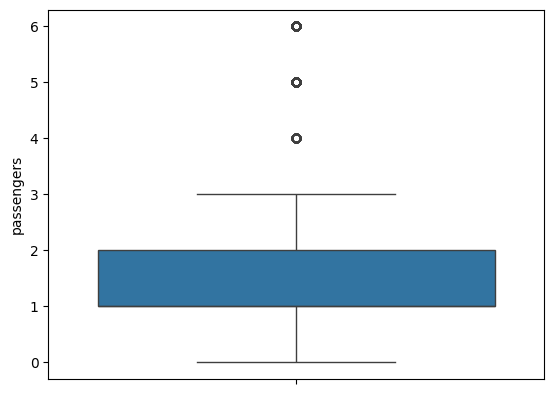

In [116]:
sns.boxplot(df['passengers'])

<Axes: xlabel='distance', ylabel='Count'>

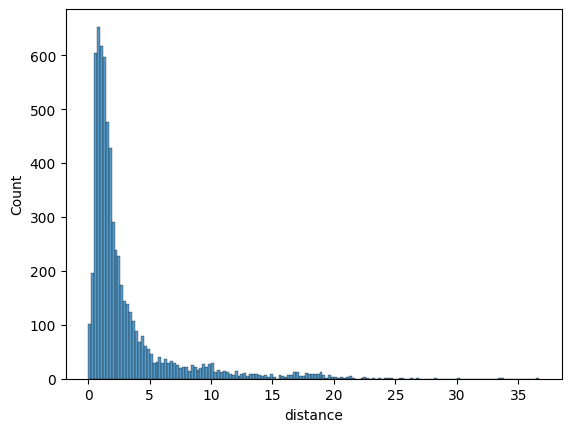

In [117]:
sns.histplot(df['distance'])

In [118]:
df['pickup_zone'].value_counts().head(10)

,count
pickup_zone,
Midtown Center,256
Upper East Side South,211
Penn Station/Madison Sq West,210
Clinton East,208
Midtown East,198
Upper East Side North,186
Times Sq/Theatre District,184
Union Sq,180
Lincoln Square East,177


<Axes: >

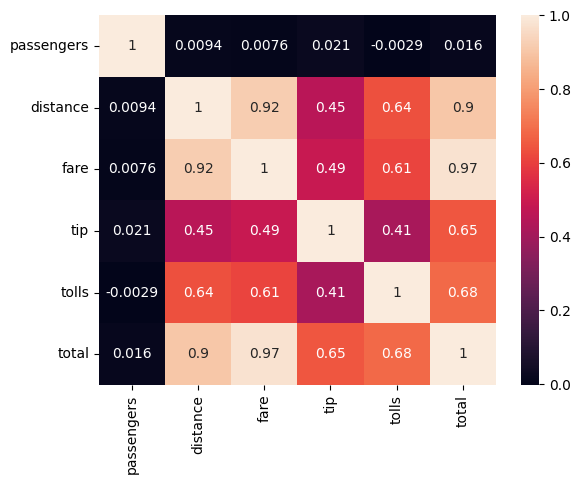

In [119]:
sns.heatmap(df.corr(numeric_only=True), annot=True )

In [120]:
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [121]:
dfd = df.drop(columns=['dropoff_zone',
       'pickup_borough', 'dropoff_borough','pickup','dropoff','color', 'payment', 'tip', 'tolls', 'total', 'passengers'])

In [122]:
dfd

,distance,fare,pickup_zone
0,1.60,7.0,Lenox Hill West
1,0.79,5.0,Upper West Side South
2,1.37,7.5,Alphabet City
3,7.70,27.0,Hudson Sq
4,2.16,9.0,Midtown East
...,...,...,...
6428,0.75,4.5,East Harlem North
6429,18.74,58.0,Jamaica
6430,4.14,16.0,Crown Heights North
6431,1.12,6.0,East New York


In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfd['pickup_zone'] = le.fit_transform(dfd['pickup_zone'])

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [125]:
cols = ['distance','fare','pickup_zone']
dfd[cols] = scaler.fit_transform(dfd[cols])

In [126]:
dfd.head()

,distance,fare,pickup_zone
0,-0.372199,-0.527324,-0.208007
1,-0.583821,-0.700471,1.261346
2,-0.432289,-0.484038,-2.127962
3,1.221502,1.204142,-0.462695
4,-0.225892,-0.354178,0.125046


In [127]:
X = dfd.drop(columns='fare')
y = dfd['fare']

from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [130]:
model.fit(X_train, y_train)

LinearRegression()

In [131]:
y_pred = model.predict(X_test)

In [132]:
y_pred

array([-0.4126503 , -0.39460543, -0.15100071, ...,  0.89147398,
       -0.34886465, -0.60325107])

In [133]:
model.score(X_test, y_test)

0.82775597482226

In [134]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

R-squared: 0.8278
Mean Squared Error: 0.1637
